# Tasks

In [1]:
# Imports:
# Data Frames.
import pandas as pd
# Machine learning Library that contains example datasets.
import sklearn as skl
# Datavisualisation library
import matplotlib.pyplot as plt
# Numerical python package
import numpy as np

## Task 1: Loading The Dataset

In [2]:
# Loading the iris dataset from the sklearn module.
iris = skl.datasets.load_iris()
df = skl.datasets.load_iris(as_frame=True)
data = df['data']

The load_iris() command returns a dataset in dictionary form, originally published by R.A. Fisher in 1936, featuring data on the sepal and petal lengths and widths of different types of iris flower species measured in centimeters.  It contains 150 instances of measurements, 50 for each species observed: Iris Setosa, Iris Versicolour and Iris Virginica. It is noted as one of the earliest used datasets in the development of classification methods. It is extremely famous and influential still to this day despite being nearly a century old.

# Task 2: Explore the Data Structure

Print and explain the shape of the data set:

In [3]:
# Shape
# Reference used: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
data.shape

(150, 4)

The dataset contains 150 instances (rows) of 4 measurements (columns), totalling 600 datapoints.

Print the first and last 5 rows of the data:

In [4]:
# The first five rows of the data:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# The last five rows of the data:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Print the feature names and the target classes.

References used:
- https://docs.python.org/3/library/array.html

In [6]:
# Printing the feature names
df['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# Printing the target classes
df['target_names'].tolist()

['setosa', 'versicolor', 'virginica']

## Task 3: Summarise the Data

For each feature in the dataset, calculate and display:

- mean
- minimum
- maximum
- standard deviation
- median

In [ ]:
# Calculate and display mean:
data.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [ ]:
# Calculate and display min:
data.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [ ]:
# Calculate and display max:
data.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [ ]:
# Calculate and display standard deviation:
data.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [ ]:
# Calculate and display median:
data.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

## Task 4: Visualize Features

Plot histograms for each feature using matplotlib.
Add appropriate titles and axis labels.

References used:
- https://matplotlib.org/stable/gallery/statistics/hist.html

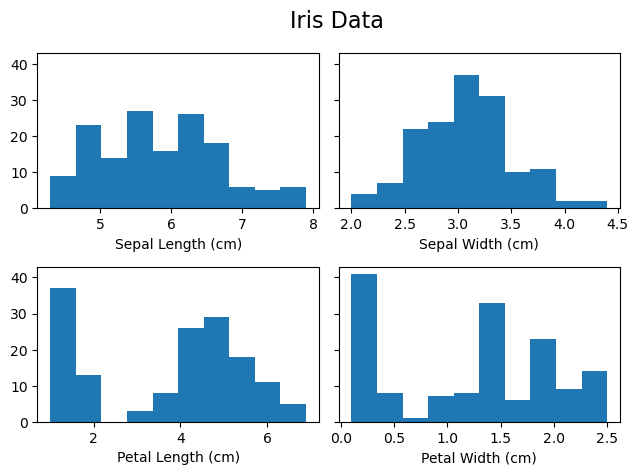

In [13]:
# Storing columns of data as variables.
dist1 = data['sepal length (cm)']
dist2 = data['sepal width (cm)']
dist3 = data['petal length (cm)']
dist4 = data['petal width (cm)']

# Creating a 2 by 2 grid of plots that share a y axis with the padding around the plots adjusted.
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

# Creating histograms in each of the 4 plots and setting x labels for each.
axs[0,0].hist(dist1)
axs[0,0].set_xlabel('Sepal Length (cm)')
axs[0,1].hist(dist2)
axs[0,1].set_xlabel('Sepal Width (cm)')
axs[1,0].hist(dist3)
axs[1,0].set_xlabel('Petal Length (cm)')
axs[1,1].hist(dist4)
axs[1,1].set_xlabel('Petal Width (cm)')

# Creating a title and setting fontsize and placement.
plt.suptitle('Iris Data', fontsize=16, x=0.535)
plt.show()

## Task 5: Scatter Plot
Choose any two features from the data set and create a scatter plot of them.  
Color-code the three different classes of the scatter plot points.

References used:
- https://stackoverflow.com/questions/30019671/why-does-my-xlabel-not-show-up-its-not-getting-cut-off
- https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots
- https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html

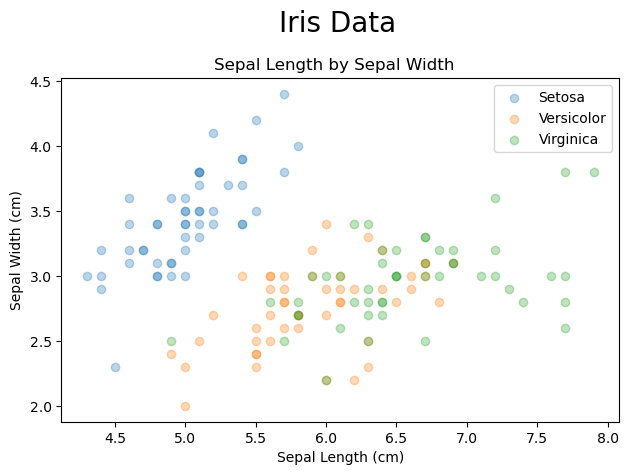

In [14]:
# Creating a single plot with adjusted padding.
fig, ax = plt.subplots(tight_layout=True)

# Creating scatter plots for each of the target variables in different colours on the same axis.
ax.scatter(dist1[0:50],dist2[0:50], c='tab:blue', label='Setosa', alpha=0.3)
ax.scatter(dist1[51:100],dist2[51:100], c='tab:orange', label='Versicolor', alpha=0.3)
ax.scatter(dist1[101:150],dist2[101:150], c='tab:green', label='Virginica', alpha=0.3)

# Setting labels for the axis.
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')

# Displaying legend.
ax.legend()

# Setting title for figure and plot.
plt.suptitle('Iris Data', fontsize=20, x=0.535)
plt.title('Sepal Length by Sepal Width', x=0.49)
plt.show()

## End